In [1]:
import geopandas as gp
import urllib
import zipfile
import requests
import json
import pandas as pd
import io
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
z_code=gp.GeoDataFrame.from_file("zip_code_040114.shp")

In [3]:
crime=z_code[["zipcode","count_vals"]]

In [4]:
income=pd.read_csv("incomebyzip.csv")

In [5]:
income=income[["ZIP\ncode [1]","Adjusted gross income (AGI)"]]

In [6]:
income.columns=["zipcode","income"]

In [101]:
census=pd.read_csv("DEC_10_DP_G001_with_ann.csv",skiprows=[0])

In [94]:
#census["GEOGRAPHIC AREA CODES - ZIP Code Tabulation Area (5 digit)"]

In [86]:
df=pd.merge(crime,income,left_on="zipcode",right_on="zipcode")

In [87]:
lm=smf.ols("count_vals~income",data=df).fit()

In [10]:
df.count_vals.describe()

count    177.000000
mean      57.711864
std       55.143424
min        1.000000
25%       17.000000
50%       39.000000
75%       76.000000
max      303.000000
Name: count_vals, dtype: float64

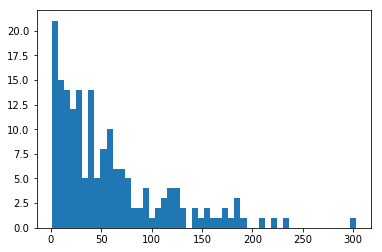

In [11]:
hist(df.count_vals,bins=50);

In [103]:
census=census[["GEOGRAPHIC AREA CODES - ZIP Code Tabulation Area (5 digit)","AREA CHARACTERISTICS - Population Count (100%)","AREA CHARACTERISTICS - Housing Unit Count (100%)"]]

In [104]:
census.columns=["zipcode","population","housing"]

In [14]:
df["zipcode"]=(df["zipcode"]).apply(int)

In [15]:
df1=pd.merge(df,census,on="zipcode")

In [16]:
lm=smf.ols("count_vals~income+population",data=df1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             count_vals   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     77.94
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           6.79e-25
Time:                        13:35:32   Log-Likelihood:                -903.80
No. Observations:                 177   AIC:                             1814.
Df Residuals:                     174   BIC:                             1823.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1289      6.535     -0.479      0.633     -16.028       9.770
income     -6.387e-06   1.85e-06     -3.447      0.001      -1e-05   -2.73e-06
population     0.0015      0.000     12.413      0.000       0.001       0.002
==============================================================================
Omnibus:                       22.520   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.396
Skew:                           0.680   Prob(JB):                     1.25e-08
Kurtosis:                       4.756   Cond. No.                     4.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
parks=gp.GeoDataFrame.from_file("geo_export_43fb1dea-1a1d-4495-89a7-2e4dcb12a1f0.shp")

In [18]:
#parkcitos=parks[parks["acres"]<10]

In [19]:
parkcitos=gp.GeoDataFrame.from_file("zip_code_040114-parkcitos.shp")

In [20]:
type(parkcitos["zipcode"][3])

unicode

In [21]:
parkcitos["zipcode"]=(parkcitos["zipcode"]).apply(int)

In [22]:
df2=pd.merge(df1,parkcitos,on="zipcode")

In [23]:
df2.columns

Index([     u'zipcode', u'count_vals_x',       u'income', u'population_x',
            u'housing',   u'cartodb_id', u'count_vals_y',          u'url',
           u'cty_fips',      u'st_fips',       u'county',        u'state',
            u'po_name',      u'bldgzip',   u'count_va_1',    u'shape_len',
         u'shape_area',         u'area', u'population_y',    u'sum_acres',
           u'geometry'],
      dtype='object')

In [112]:
lm=smf.ols("count_vals_x~income+population_x+sum_acres",data=df2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           count_vals_x   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     41.24
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           3.94e-24
Time:                        14:37:28   Log-Likelihood:                -889.57
No. Observations:                 175   AIC:                             1789.
Df Residuals:                     170   BIC:                             1805.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      190.8894     65.150      2.930      0.004      62.282     319.497
income       -9.081e-06   2.03e-06     -4.483      0.000   -1.31e-05   -5.08e-06
population_x     0.0015      0.000     11.008      0.000       0.001       0.002
sum_acres        0.5709      0.328      1.738      0.084      -0.078       1.219
zipcode         -0.0182      0.006     -3.071      0.002      -0.030      -0.007
==============================================================================
Omnibus:                       18.820   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.263
Skew:                           0.509   Prob(JB):                     1.34e-08
Kurtosis:                       4.985   Cond. No.                     4.79e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
#df2.to_csv("parks_robbery_census.csv")

Cluster crimes by variables after PCA

Distance of crime to park

https://factfinder.census.gov/faces/nav/jsf/pages/download_center.xhtml
https://factfinder.census.gov/service/getStatisticalData.html

http://guides.ucf.edu/c.php?g=78401&p=516944

Repetir para rape
Agregar crímenes en parques
Hacer ridge y lazo

In [45]:
crime_in_park=pd.read_excel("nyc-park-crime-stats-q1-2016.xlsx",skiprows=3)
crime_in_park1=pd.read_excel("nyc-park-crime-stats-q1-2016.xlsx",skiprows=3)
crime_in_park2=pd.read_excel("nyc-park-crime-stats-q2-2016.xlsx",skiprows=3)
crime_in_park3=pd.read_excel("nyc-park-crime-stats-q3-2016.xlsx",skiprows=3)
crime_in_park4=pd.read_excel("nyc-park-crime-stats-q4-2016.xlsx",skiprows=3)

In [46]:
def sum_crime(crime):
    crime_in_park[crime]=crime_in_park1[crime]+crime_in_park2[crime]+crime_in_park3[crime]+crime_in_park4[crime]

In [57]:
crime_in_park.columns

Index([u'PARK', u'BOROUGH', u'SIZE (ACRES)', u'CATEGORY', u'MURDER', u'RAPE',
       u'ROBBERY', u'FELONY ASSAULT', u'BURGLARY', u'GRAND LARCENY',
       u'GRAND LARCENY OF MOTOR VEHICLE', u'TOTAL'],
      dtype='object')

In [60]:
crime_list=[u'MURDER', u'RAPE', u'ROBBERY', u'FELONY ASSAULT', u'BURGLARY', u'GRAND LARCENY',u'GRAND LARCENY OF MOTOR VEHICLE', u'TOTAL']

In [62]:
for item in crime_list:
    sum_crime(item)

In [65]:
#crime_in_park.to_csv("Total_crime_in_parks.csv")
#ped_count=gp.GeoDataFrame.from_file("geo_export_ee89c708-13e7-4b94-b037-130cac134d7c.shp")
#ped_count=ped_count.sum(axis=1)
#ped_count.head()

In [119]:
crime_in_park.columns

Index([u'PARK', u'BOROUGH', u'SIZE (ACRES)', u'CATEGORY', u'MURDER', u'RAPE',
       u'ROBBERY', u'FELONY ASSAULT', u'BURGLARY', u'GRAND LARCENY',
       u'GRAND LARCENY OF MOTOR VEHICLE', u'TOTAL'],
      dtype='object')

In [130]:
#transform to upper case so that we can merge
parks.signname=parks.signname.str.upper()

In [135]:
df_try=pd.merge(parks,crime_in_park,left_on="signname",right_on='PARK',how="left")

In [125]:
#crime_in_park.PARK

In [141]:
df_try=df_try.fillna(value=0)

In [159]:
df_try.TOTAL.sum()

1189.0

In [176]:
df_try[["zipcode"]]

,zipcode
0,11201
1,11221
2,11429
3,"11096, 11430, 11691"
4,11211
5,10037
6,11201
7,10467
8,10462
9,11212


In [168]:
df_try[["TOTAL","zipcode"]]

,TOTAL,zipcode
0,0.0,11201
1,0.0,11221
2,0.0,11429
3,0.0,"11096, 11430, 11691"
4,0.0,11211
5,0.0,10037
6,0.0,11201
7,0.0,10467
8,1.0,10462
9,0.0,11212
